In [72]:
import pandas as pd
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy.visualization import ZScaleInterval
from matplotlib.animation import FuncAnimation
import tqdm
import os
import imageio.v2 as imageio
from IPython.display import Image
import sys
import csv
from astropy import stats
import numpy as np
from matplotlib.patches import Circle, Rectangle
from fast_histogram import histogram2d, histogram1d
import random
from photutils.background import Background2D, MedianBackground

In [2]:
fn = '/Users/cm/github/gPhoton2/test_data/e23456/e23456-nd-tfull-b00-image-g.fits.gz'

In [3]:
image = fits.open(fn)

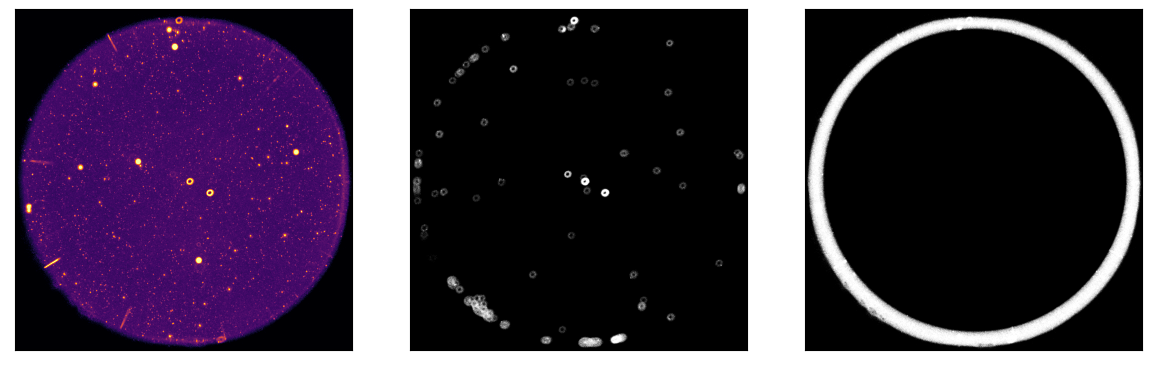

In [4]:
fig,axs = plt.subplots(nrows=1, ncols=3,
                       figsize=(12,4))
plt.tight_layout()
for i in range(3):
    axs[i].set_xticks([])
    axs[i].set_yticks([])

axs[0].imshow(ZScaleInterval()(image[1].data),cmap="inferno",origin="lower");
axs[1].imshow(ZScaleInterval()(image[2].data),cmap="binary_r",origin="lower");
axs[2].imshow(ZScaleInterval()(image[3].data),cmap="binary_r",origin="lower");

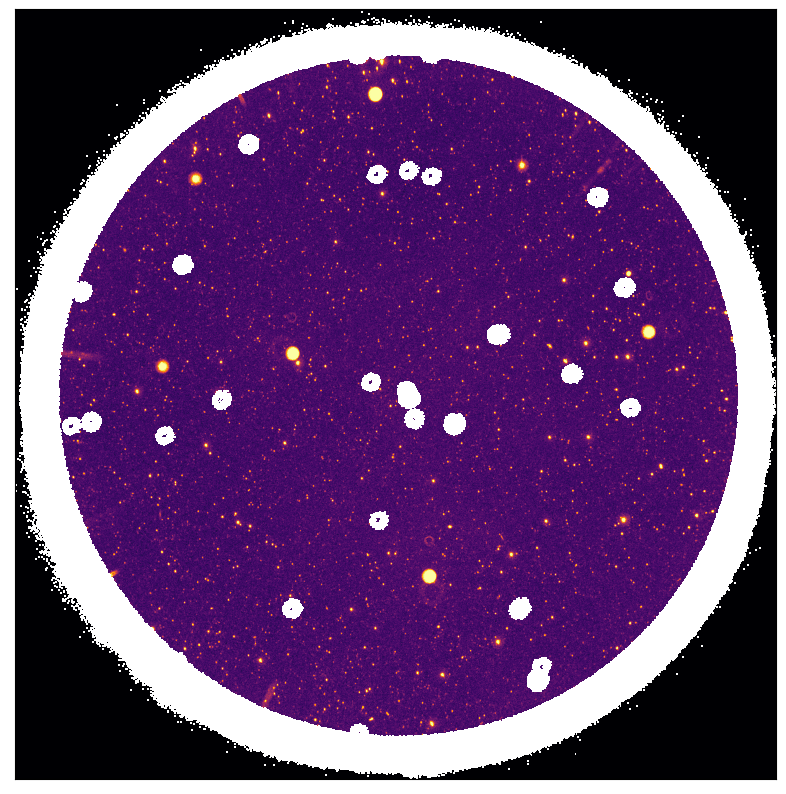

In [5]:
masked = image[1].data
masked[np.where(image[2].data)] = np.nan
masked[np.where(image[3].data)] = np.nan
plt.figure(figsize=(10,10))
plt.imshow(ZScaleInterval()(masked),cmap="inferno",origin="lower");
plt.xticks([]);plt.yticks([]);

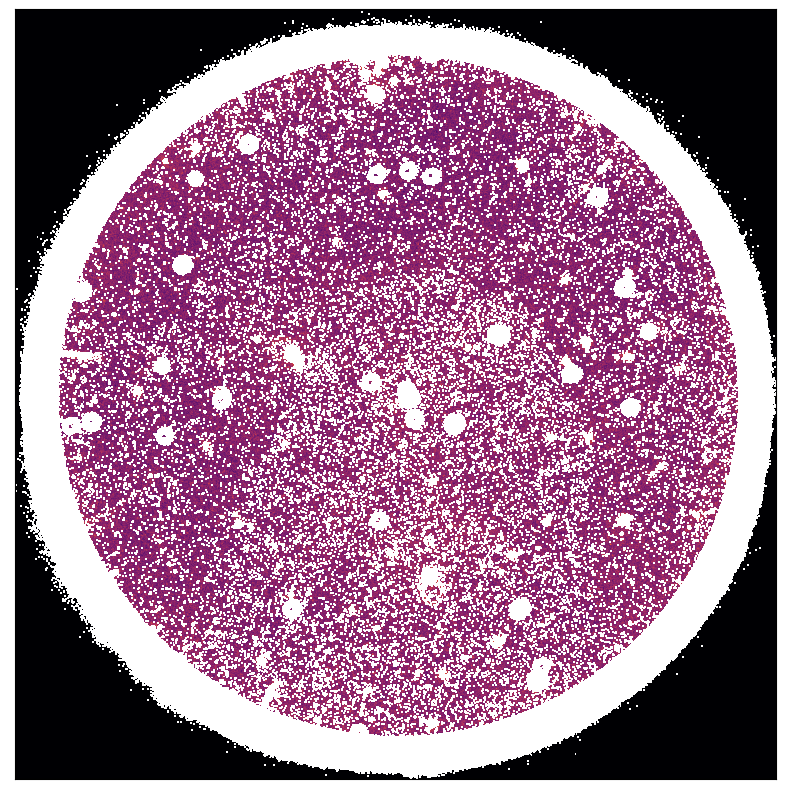

In [69]:
clipped = stats.sigma_clip(masked.flatten(),masked=False,axis=0,maxiters=10,sigma=3,sigma_lower=10).reshape(masked.shape)
plt.figure(figsize=(10,10))
plt.imshow(ZScaleInterval()(clipped),cmap="inferno",origin="lower");
plt.xticks([]);plt.yticks([]);

In [60]:
rows = np.where(np.ones(image[1].data.shape))[0].reshape(image[1].data.shape)
cols = np.where(np.ones(image[1].data.shape))[1].reshape(image[1].data.shape)

In [61]:
#xix,yix = np.where(np.isnan(masked))
#for x,y in tqdm.tqdm(zip(xix,yix)):
#    d = np.sqrt((x-cols)**2+(y-rows)**2)
#    ix = np.where((d<100) & np.isfinite(clipped))

In [62]:
x,y=(image[1].data.shape[0]/2,
     image[1].data.shape[1]/2)
d = np.sqrt((x-cols)**2+(y-rows)**2)
ix = np.where((d<1400) & np.isfinite(clipped))
faked = np.array(random.choices(clipped[ix],k=len(image[1].data.flatten()))).reshape(image[1].data.shape)

In [63]:
remade = clipped.copy()
ix = np.where((d<1400) & np.isnan(clipped))
remade[ix] = faked[ix]

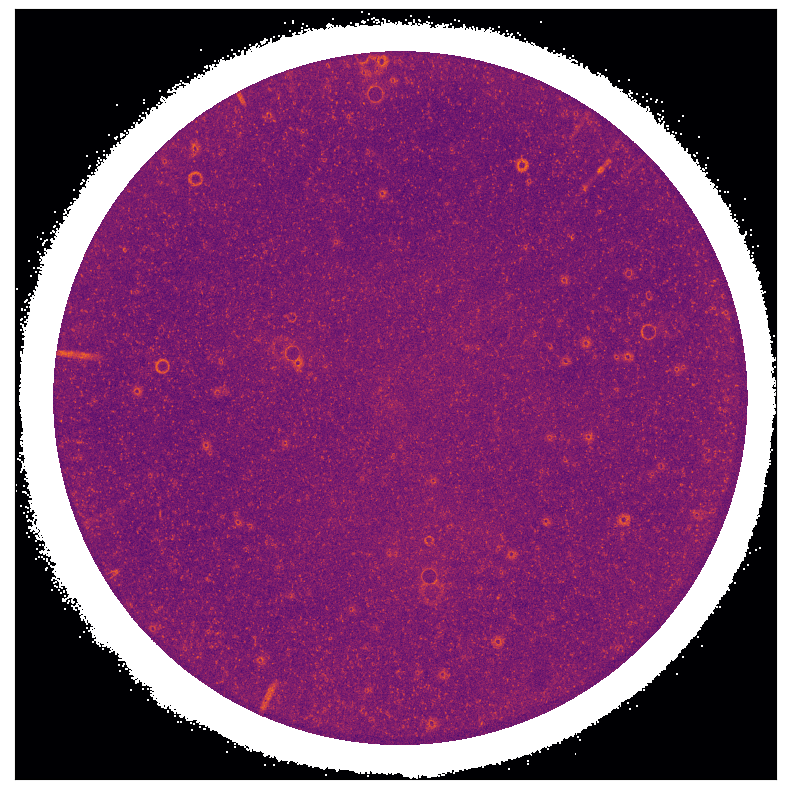

In [64]:
plt.figure(figsize=(10,10))
plt.imshow(ZScaleInterval()(remade),cmap="inferno",origin="lower");
plt.xticks([]);plt.yticks([]);

In [79]:
sigma_clip = stats.SigmaClip(sigma=3.0)
bkg_estimator = MedianBackground()
bkg = Background2D(masked, (20, 20), filter_size=(3, 3),
                    sigma_clip=sigma_clip, bkg_estimator=bkg_estimator)


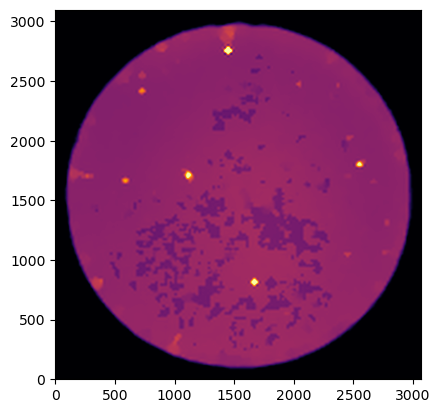

In [80]:
#plt.imshow(bkg.background, origin='lower', cmap='Greys_r',
#           interpolation='nearest')
#
plt.imshow(ZScaleInterval()(bkg.background),cmap="inferno",origin="lower");
